In [266]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from lib5 import quad, getV
import lin_Fit as lf
from scipy.signal import argrelmax

In [267]:
df=pd.read_csv('completa0.txt', sep = '\t', skiprows=1)

# Analisi 4.5

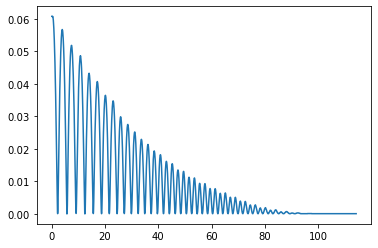

In [268]:
h = df['Position (m)'].to_numpy()
t = df['Time (s)'].to_numpy()
H = h.max()-h#cosi facendo i punti piu alti sono effetivamente le quote raggiunte dal pesetto oscillazione dopo oscillazione
plt.plot(t,H)

In [269]:
CUT=argrelmax(H)
print(CUT)


(array([  18,  534,  539,  700,  854, 1922, 2775, 3161], dtype=int64),)


# Calcolo di \Deltah/h

[ 9.01856764e-02  5.53935860e-02  1.09567901e-01  6.67244367e-02
  1.03064067e-01  4.03726708e-02  1.57497303e-01  8.32266325e-02
  7.12290503e-02  1.05263158e-01  5.88235294e-02  9.46428571e-02
  1.08481262e-01  7.96460177e-02  2.16346154e-02  1.52334152e-01
  3.18840580e-02  1.19760479e-01  1.36054422e-02  1.37931034e-01
  2.00000000e-02  1.75510204e-01 -4.95049505e-03  1.77339901e-01
  2.40000000e+01]


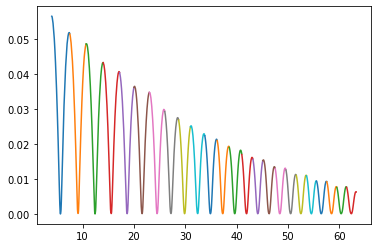

In [279]:
cut=np.array([  18,  200, 375, 534 ,  700,  860, 1000, 1150, 1300, 1435, 1550,1690, 1810, 1928, 2050 ,2158, 2255, 2375,2480, 2580 ,2680, 2777,2877,2975,3070,3164])
delta_H=np.arange(25.0)
for i in range(cut.size-1):
    
    H_=H[cut[i]:cut[i+1]]
    t_=t[cut[i]:cut[i+1]]
    delta_H[i]=(H[cut[i]]- H[cut[i+1]])/ H[cut[i]]
    (delta_H[i])
    plt.plot(t_,H_)
    
print(delta_H)

200 375
534 700
860 1000
1150 1300
1435 1550
1690 1810
1928 2050
2158 2255
2375 2480
2580 2680
2777 2877
2975 3070
[ 9.01856764e-02  1.09567901e-01  1.03064067e-01  1.57497303e-01
  7.12290503e-02  5.88235294e-02  1.08481262e-01  2.16346154e-02
  3.18840580e-02  1.36054422e-02  2.00000000e-02 -4.95049505e-03
  1.20000000e+01]


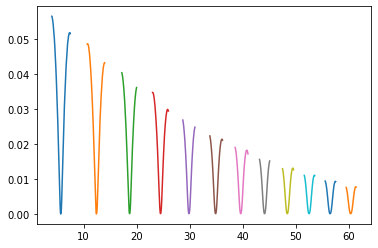

In [278]:
cut=np.array([  18,  200, 375, 534 ,  700,  860, 1000, 1150, 1300, 1435, 1550,1690, 1810, 1928, 2050 ,2158, 2255, 2375,2480, 2580 ,2680, 2777,2877,2975,3070,3164])
delta_H=np.arange(13.0)
for i in range(int(cut.size/2)):
    
    H_=H[cut[2*i]:cut[2*i+1]]
    t_=t[cut[2*i]:cut[2*i+1]]
    plt.plot(t_,H_)
for i in range(int(cut.size/2)):
    delta_H[i]=(H[cut[2*i]]-H[cut[2*i+1]])/H[cut[2*i]]
    print(cut[2*i],cut[2*i+1])
    
print(delta_H)   

In [272]:
delta=np.mean(delta_H)
std=np.std(delta_H)
print(delta,std)

0.10440622559243044 0.04328439459146668


# istogramma di deltah/h e calcolo di Ma 

(array([4., 4., 2., 3.]),
 array([0.04037267, 0.07461448, 0.10885629, 0.14309809, 0.1773399 ]),
 <BarContainer object of 4 artists>)

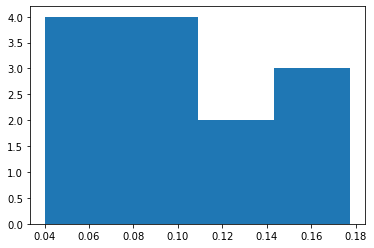

In [273]:
binsize=std
interval_bins=delta_H.max()-delta_H.min()
nbins=int(interval_bins/binsize+1)
plt.hist(delta_H,nbins)



In [274]:
r=0.01066
m=0.5593
g=9.8065
M_a1=(m*g*r*delta)/(2-delta)
M_a1


0.0032203062786616055

In [275]:
ris=0.0000005
sigma_m=0.1
sigma_r=0.000022
sigma_M=(((g*r*delta*sigma_m)/(2-delta))**2 + ((m*g*delta*sigma_r)/(2-delta))**2 + ((2*std*m*g*r*(1-delta))/(2-delta)**2)**2)**0.5
sigma_M

0.0013867302343144186

In [276]:
B = 2.9728
m_b = 0.0535167
R = 0.17666
M_a2 = m*g*r -(2*m_b*R*R)/(B*r)
M_a2

-0.04694012462951171

In [277]:
(M_a2-M_a1)/(0.0035**2 + sigma_M**2)**0.5

-13.323859589329576